 ## Correlative Nature of Risk Factors in Suicide

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.cluster import KMeans as km
from sklearn.mixture import GaussianMixture as GMM
import sklearn.metrics as metrics

In [2]:
age_df = pd.read_csv('AgeDataset-V1.csv')
age_df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [4]:
age_df['Manner of death'].value_counts()

natural causes                    33532
suicide                            5814
accident                           5044
homicide                           4692
capital punishment                 3415
                                  ...  
suicide; substance abuse              1
occupational injury                   1
shooting                              1
capital punishment; auto-da-fé        1
stomach cancer                        1
Name: Manner of death, Length: 206, dtype: int64

In [15]:
suicide_df = age_df.loc[age_df['Manner of death'] == 'suicide']
suicide_df = suicide_df.where(suicide_df['Birth year'] > 1800)
suicide_df = suicide_df.dropna()
suicide_df.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
14,Q352,Adolf Hitler,"Austrian-born German politician, chancellor an...",Male,Nazi Germany; Austria-Hungary; Weimar Republic...,Statesperson,1889.0,1945.0,suicide,56.0
23,Q440,Salvador Allende,28th president of Chile (1908–1973),Male,Chile,Politician,1908.0,1973.0,suicide,65.0
131,Q1322,José Manuel Balmaceda,Chilean politician and President (1840-1891),Male,Chile,Politician,1840.0,1891.0,suicide,51.0
189,Q2022,Cesare Pavese,"Italian poet, novelist, literary critic, and t...",Male,Italy; Kingdom of Italy,Researcher,1908.0,1950.0,suicide,42.0
323,Q4616,Marilyn Monroe,"American actress, model, and singer (1926-1962)",Female,United States of America,Artist,1926.0,1962.0,suicide,36.0


(0.0, 100.0)

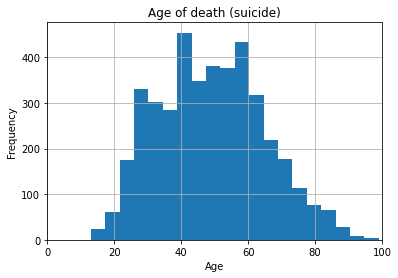

In [58]:
suicide_df.hist('Age of death', bins = 20)
plt.title('Age of death (suicide)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 100)

In [ ]:
age_df.hist('Age of death', bins = 20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(xmin=0, xmax = 100)

(0.0, 100.0)

Text(0.5, 1.0, 'Suicide occurences by birth year')

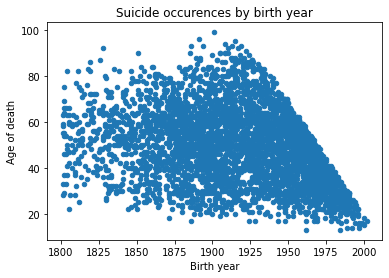

In [29]:
suicide_df.plot.scatter(x='Birth year', y='Age of death')
plt.title('Suicide occurences by birth year')

Text(0.5, 1.0, 'Suicide occurences by death year')

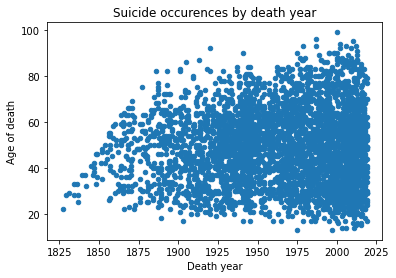

In [30]:
suicide_df.plot.scatter(x='Death year', y='Age of death')
plt.title('Suicide occurences by death year')

In [42]:
suicide_df['Occupation'].value_counts()

Artist                                             1731
Politician                                          580
Athlete                                             497
Military personnel                                  245
Researcher                                          244
                                                   ... 
Dissident                                             1
Psychiatrist; philosopher                             1
Organ builder; musical instrument maker               1
Naval officer; explorer; colonial administrator       1
Settler                                               1
Name: Occupation, Length: 312, dtype: int64

In [27]:
age_df['Occupation'].value_counts()

Artist                     281512
Politician                 195390
Athlete                    110943
Researcher                  90709
Military personnel          52911
                            ...  
Socialite; heiress              1
Biologist; explorer             1
Perfumer; art collector         1
Condottiero; magistrate         1
Tailor; model                   1
Name: Occupation, Length: 9313, dtype: int64

In [33]:
suicide_df['Gender'].value_counts()

3554

In [37]:
suicide_gender_ratio = suicide_df['Gender'].value_counts()['Male']/suicide_df['Gender'].value_counts()['Female']
print(suicide_gender_ratio)

5.6864


In [32]:
age_df['Gender'].value_counts()

Male                                              981365
Female                                            107830
Transgender Female                                    79
Transgender Male                                      36
Eunuch; Male                                          18
Intersex                                               7
Female; Male                                           7
Eunuch                                                 3
Transgender Male; Female                               3
Intersex; Female                                       2
Non-Binary                                             2
Intersex; Male                                         2
Transgender Female; Male                               2
Female; Female                                         1
Transgender Female; Intersex                           1
Transgender Female; Female                             1
Transgender Male; Male                                 1
Intersex; Transgender Male     

In [38]:
age_gender_ratio = age_df['Gender'].value_counts()['Male'] / age_df['Gender'].value_counts()['Female']
print(age_gender_ratio)

9.101038671983678


In [48]:
suicide_df['Country'].value_counts()

United States of America                     1111
Germany                                       328
France                                        310
United Kingdom                                174
Japan                                         125
                                             ... 
France; Israel                                  1
Estonia; Soviet Union; Russian Empire           1
United States of America; Austria-Hungary       1
Northern Ireland; Ireland                       1
Trinidad and Tobago                             1
Name: Country, Length: 325, dtype: int64

In [46]:
age_df['Country'].value_counts()

United States of America                                       152761
Germany                                                         95081
France                                                          78666
United Kingdom; United Kingdom of Great Britain and Ireland     29684
Sweden                                                          26915
                                                                ...  
Nazi Germany; Socialist Federal Republic of Yugoslavia              1
Lithuania; Belarus                                                  1
Spain; Kingdom of England                                           1
France; United Kingdom; Russian Empire                              1
El Salvador; British Empire                                         1
Name: Country, Length: 5961, dtype: int64